In [1]:
import torch
import numpy as np

In [39]:
local_data = '/mnt/d/Users/Admin/Projects/Machine_Learning/data'
data_lst = [local_data]
data = data_lst[0]

# Tensors

## Making Tensors

In [2]:
data = [[1, 2], [3,4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [6]:
np_arr = np.array(data)
# converts numpy to tensor
x_np = torch.from_numpy(np_arr)
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [11]:
# converts tensor to numpy arr
x_np.numpy()

array([[1, 2],
       [3, 4]])

In [24]:
x_ones = torch.ones_like(x_data)
print(f"Ones array: \n {x_ones} \n")

# from uniform distribution of [0, 1)
x_rand = torch.rand_like(x_data, dtype = torch.float32)
print(f"Random array: \n {x_rand}")

Ones array: 
 tensor([[1, 1],
        [1, 1]]) 

Random array: 
 tensor([[0.0465, 0.4157],
        [0.6882, 0.8248]])


In [25]:
shape = (2,3)
rand_tensor = torch.rand(size = shape)
ones_tensor = torch.ones(size = shape)
zeros_tensor = torch.zeros(size = shape)

print(f" \n {rand_tensor} \n {ones_tensor} \n {zeros_tensor}")

 
 tensor([[0.1360, 0.5099, 0.2277],
        [0.8319, 0.2293, 0.3090]]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor

In [14]:
tensor = torch.rand( (3,4) )

print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

tensor([[0.1413, 0.4601, 0.7207, 0.3900],
        [0.3650, 0.3682, 0.6393, 0.2499],
        [0.1942, 0.3584, 0.6675, 0.6966]])
torch.Size([3, 4])
torch.float32
cpu


In [15]:
# this moves the tensor to gpu 
tensor_gpu = tensor.to("cuda")
# alternatively, tensor.cuda() works too
tensor_gpu

tensor([[0.1413, 0.4601, 0.7207, 0.3900],
        [0.3650, 0.3682, 0.6393, 0.2499],
        [0.1942, 0.3584, 0.6675, 0.6966]], device='cuda:0')

In [18]:
# moves back from gpu to tensor
tensor_cpu = tensor_gpu.to("cpu")
print(tensor_cpu)

# if you want a tensor_gpu to numpy arr
# have to convert to tensor gpu to cpu first then np arr
tensor_np = tensor_gpu.to("cpu").numpy()
print(tensor_np)

tensor([[0.1413, 0.4601, 0.7207, 0.3900],
        [0.3650, 0.3682, 0.6393, 0.2499],
        [0.1942, 0.3584, 0.6675, 0.6966]])
[[0.14130443 0.46009535 0.7206768  0.39004004]
 [0.3649965  0.3682297  0.6392953  0.24988264]
 [0.19417405 0.35844493 0.6675095  0.6965933 ]]


In [47]:
tensor = torch.randint(low = 0, high = 100, size = (4,4)).to("cuda")
tensor

tensor([[62, 51, 79, 68],
        [ 4, 75, 66, 58],
        [44,  1, 76, 37],
        [54, 71, 94, 24]], device='cuda:0')

In [49]:
print(f"First row: {tensor[0, :]}")
print(f"First col: {tensor[:, 0]}")
print(f"Last col: {tensor[:, -1]}")

# change the second col to all zeros
tensor[:, 1] = 0
print(tensor)

First row: tensor([62, 51, 79, 68], device='cuda:0')
First col: tensor([62,  4, 44, 54], device='cuda:0')
Last col: tensor([68, 58, 37, 24], device='cuda:0')
tensor([[62,  0, 79, 68],
        [ 4,  0, 66, 58],
        [44,  0, 76, 37],
        [54,  0, 94, 24]], device='cuda:0')


In [54]:
# join based on rows
t1 = torch.cat([tensor, tensor, tensor], dim = 0)
t1

tensor([[62,  0, 79, 68],
        [ 4,  0, 66, 58],
        [44,  0, 76, 37],
        [54,  0, 94, 24],
        [62,  0, 79, 68],
        [ 4,  0, 66, 58],
        [44,  0, 76, 37],
        [54,  0, 94, 24],
        [62,  0, 79, 68],
        [ 4,  0, 66, 58],
        [44,  0, 76, 37],
        [54,  0, 94, 24]], device='cuda:0')

In [52]:
# join based on cols
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
t1

tensor([[62,  0, 79, 68, 62,  0, 79, 68, 62,  0, 79, 68],
        [ 4,  0, 66, 58,  4,  0, 66, 58,  4,  0, 66, 58],
        [44,  0, 76, 37, 44,  0, 76, 37, 44,  0, 76, 37],
        [54,  0, 94, 24, 54,  0, 94, 24, 54,  0, 94, 24]], device='cuda:0')

In [56]:
arr_sum = tensor.sum()
sum_val = arr_sum.item()
print(sum_val, type(sum_val))

666 <class 'int'>


# Datasets and DataLoaders

In [2]:
import os 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [21]:
training_data = datasets.FashionMNIST(
    root = data,
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = data,
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:02<00:00, 9.00MB/s]
100%|███████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 156kB/s]
100%|███████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:07<00:00, 622kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 10.9MB/s]


In [44]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /mnt/d/Users/Admin/Projects/Machine_Learning/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [45]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /mnt/d/Users/Admin/Projects/Machine_Learning/data
    Split: Test
    StandardTransform
Transform: ToTensor()

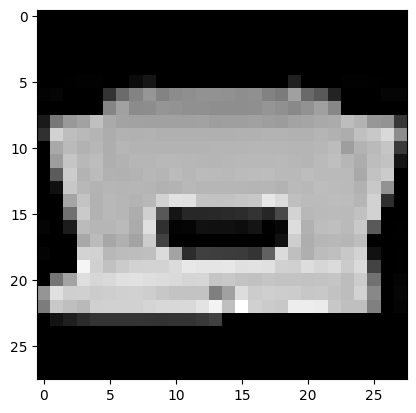

In [38]:
plt.imshow(training_data[999][0].squeeze(), cmap = "gray")

In [ ]:
import pandas as pd
from torchvision.io import decode_image

